In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets

In [3]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X)
df[13] = y

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#parametri che voglio testare tramite ricerca esaustiva con GridSearchCV 
params = {
    'hidden_layer_sizes': [(10,2), (10), (5,5), (20,10), (30), (40), (50), (40,20)],
    'learning_rate_init' : [0.01, 0.001, 0.005]
}

#MLP di partenza
mlp = MLPClassifier(activation='tanh', solver='adam', max_iter=10000, learning_rate='adaptive')

#testo i diversi parametri con 5-fold cross validation 
clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
clf.fit(X, y)

print("Best estimator: ", clf.best_estimator_)

#testo come funziona il migliore stimatore trovato con 5-fold cross validation
nn = clf.best_estimator_
scores = cross_val_score(clf, X, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Best estimator:  MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=40, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Accuracy: 0.94 (+/- 0.08)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

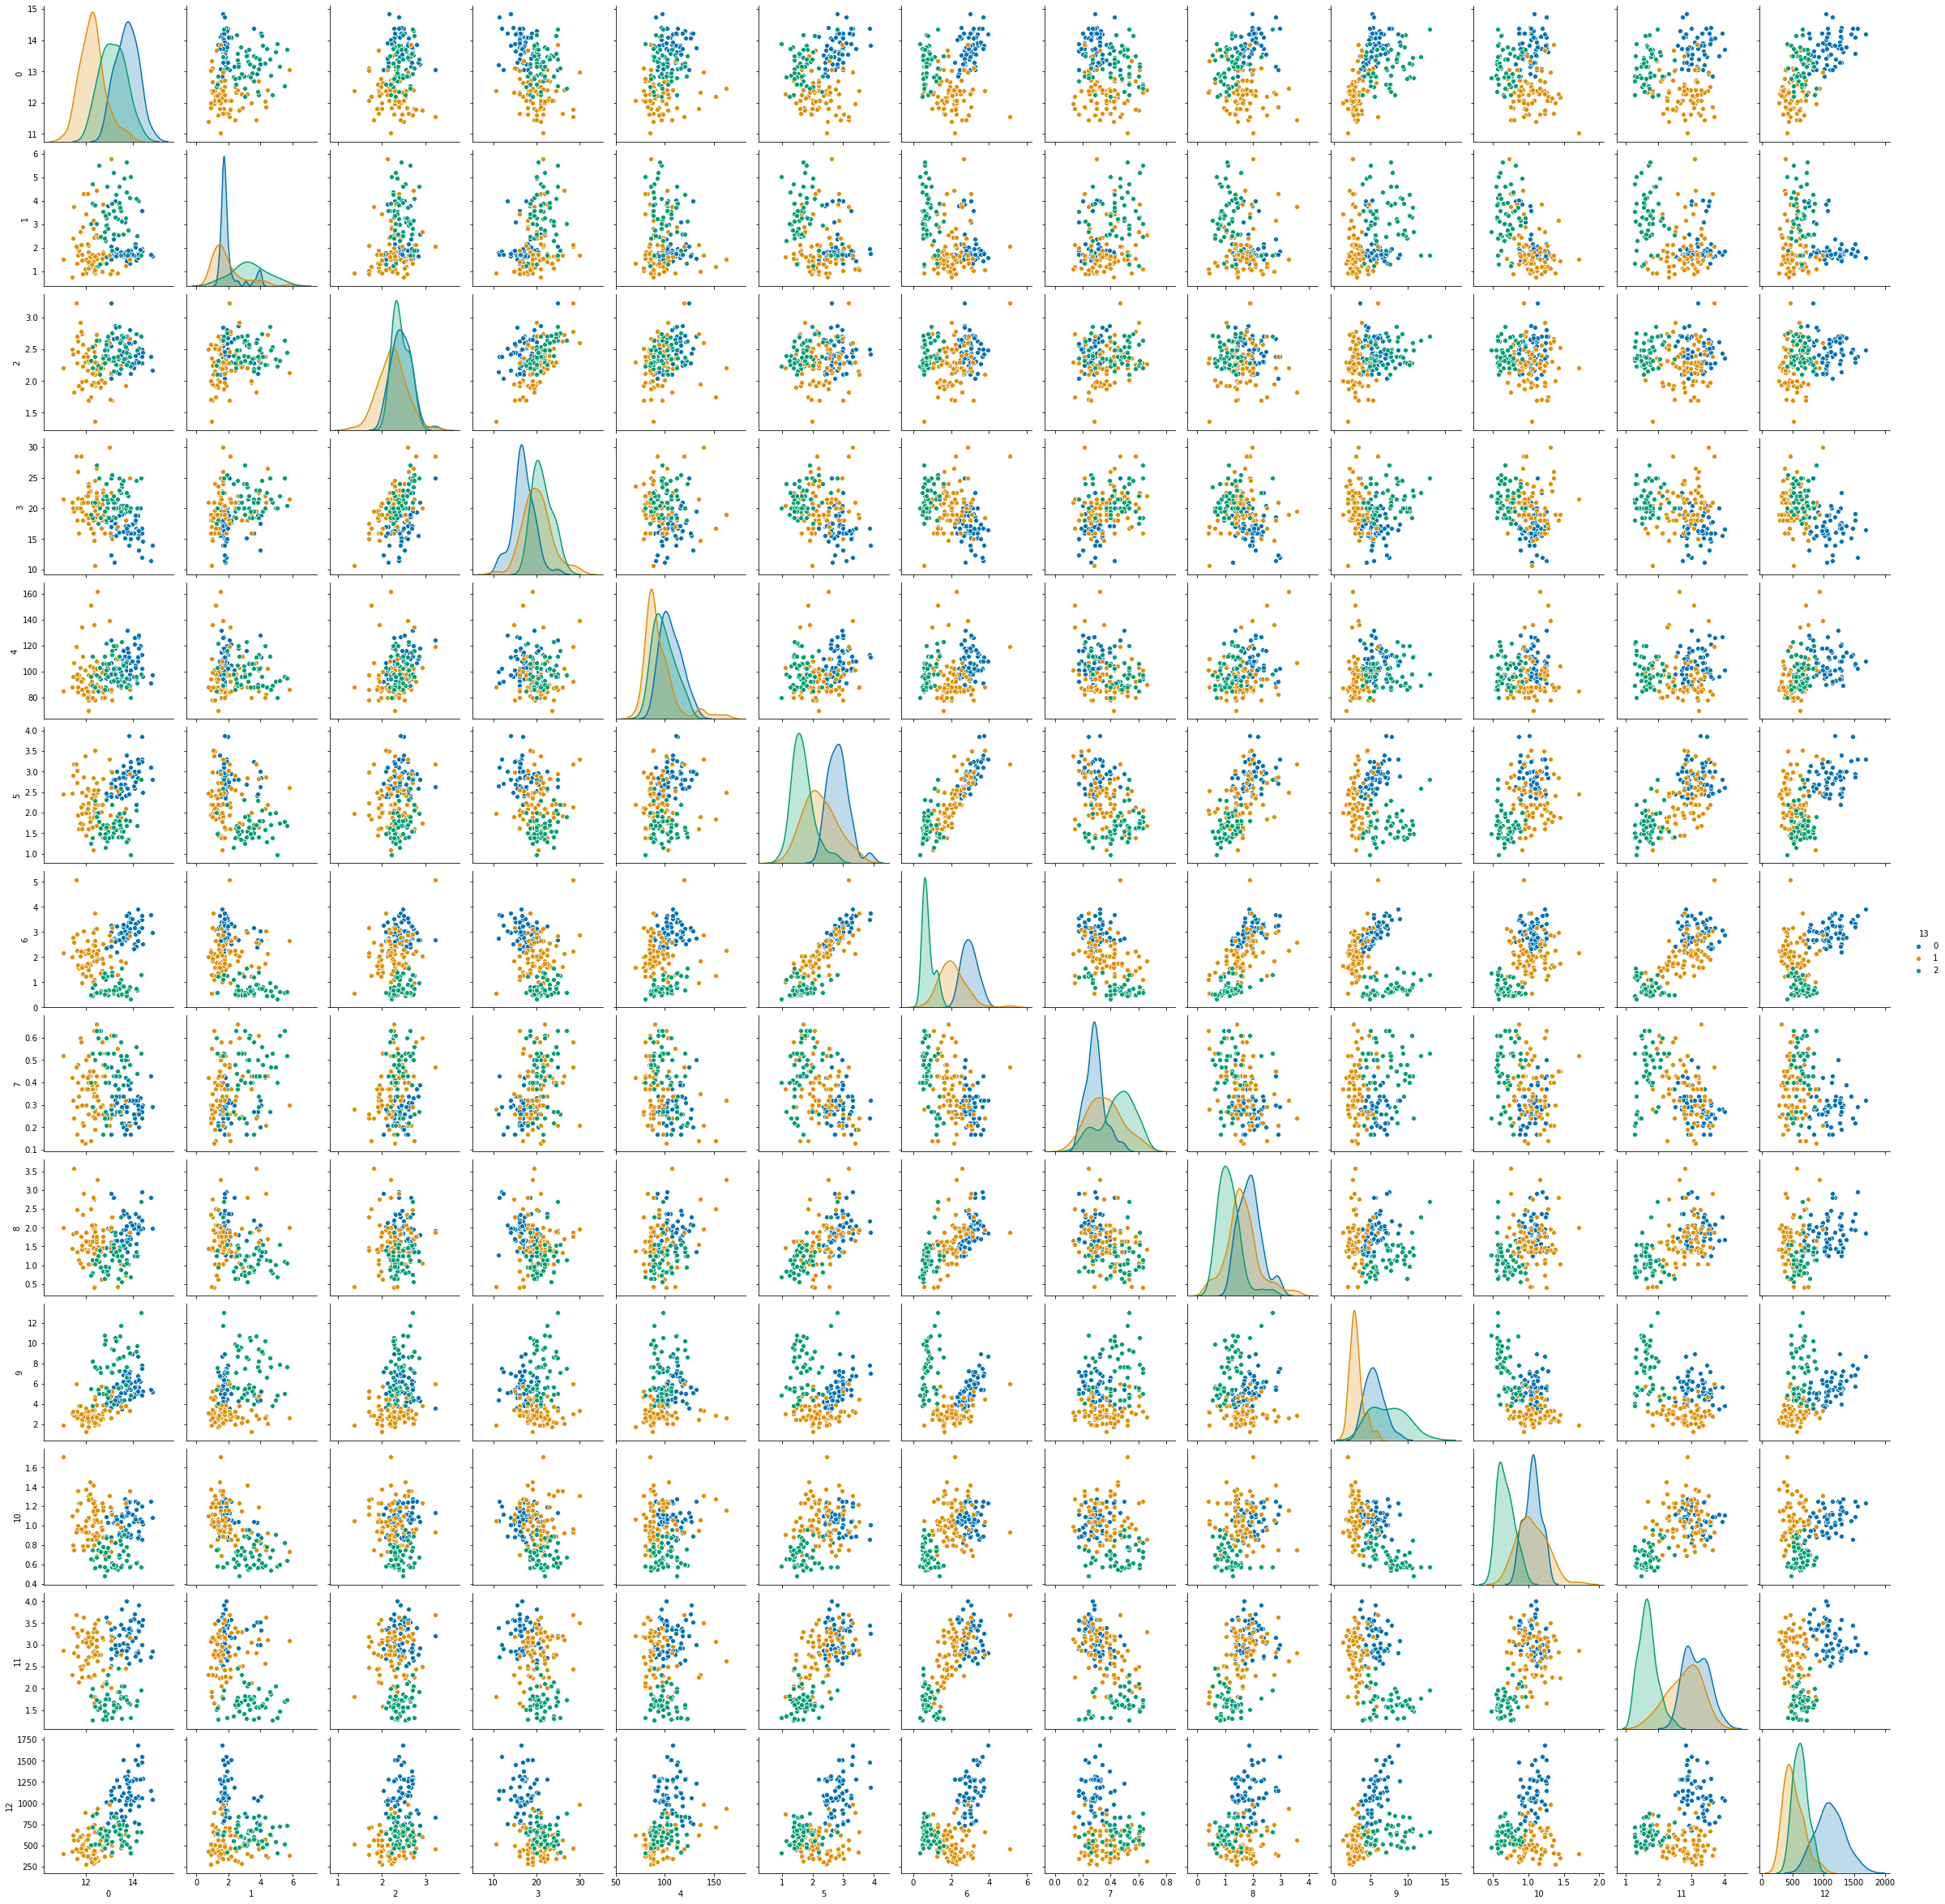

In [6]:
# Basic correlogram
sns.pairplot(df, palette="colorblind", diag_kind="kde", hue=13)
plt.show()

In [7]:
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [8]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(3):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(wine.target_names[i]), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

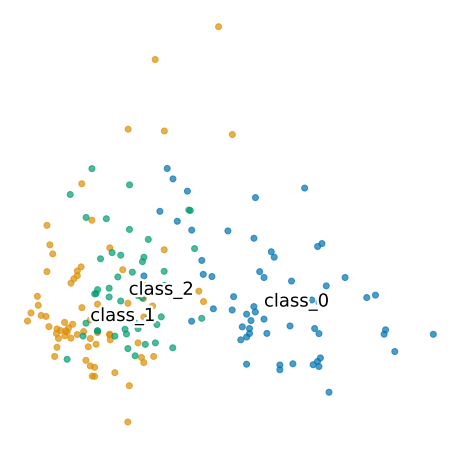

In [9]:
fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int))
plt.show()

In [10]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

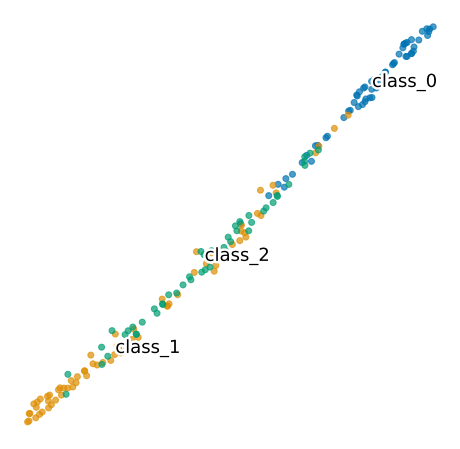

In [11]:
fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int))
plt.show()